In [1]:
import pandas as pd
df = pd.read_csv('liwc1.csv')
df.head()

,Unnamed: 0,rep_score,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function.,...,home,money,relig,death,informal,swear,netspeak,assent,nonflu,fIller
0,0,0.25,96.30,34.06,26.12,20.15,20.62,39.18,66.79,32.46,...,0.0,0.00,0.0,0.37,0.00,0.0,0.00,0.0,0.00,0.0
1,1,0.00,99.00,63.49,7.40,94.13,25.38,31.53,65.02,37.44,...,0.0,0.49,0.0,0.00,0.49,0.0,0.49,0.0,0.00,0.0
2,2,0.25,96.95,71.80,19.62,18.67,17.33,43.27,63.46,36.06,...,0.0,0.48,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0
3,3,0.33,99.00,69.05,2.75,63.50,25.12,35.32,65.67,42.79,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0
4,4,0.00,99.00,47.44,30.21,43.21,19.56,33.23,71.25,35.46,...,0.0,0.64,0.0,0.00,0.32,0.0,0.00,0.0,0.32,0.0


In [2]:
data = df.values
X, y = data[:, 2:], data[:, 1]

from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y=train_test_split(X, X, test_size=0.20, random_state=1)

from sklearn import preprocessing
# Standardising the variables
train_X=preprocessing.scale(train_X)
test_X=preprocessing.scale(test_X)

import numpy as np
#Running Lasso: 
from sklearn import linear_model 
lasso=linear_model.MultiTaskLassoCV(max_iter=2000,cv=10,normalize=False)
lasso.fit(train_X,train_Y)
lasso.alpha_

0.02105858995192461

In [3]:
# Train error of Lasso: 
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(train_Y,lasso.predict(train_X))

# R^2 of Train sample
rsquared_train = lasso.score(train_X,train_Y)
print("The MSE on Train data is :", mse_train)
print("The R^2 on Train data is:", rsquared_train)

The MSE on Train data is : 0.0020655899314963744
The R^2 on Train data is: 0.9967934886516723


In [4]:
# Test error of Lasso: 
from sklearn.metrics import mean_squared_error
mse_test=mean_squared_error(test_Y,lasso.predict(test_X))

# R^2 of Test sample
rsquared_test=lasso.score(test_X,test_Y)
print("The MSE on Test data is :", mse_test)
print("The R^2 on Test data is:", rsquared_test)

The MSE on Test data is : 0.01121736735678384
The R^2 on Test data is: 0.9814630085254545


In [5]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.021) # lasso has the probability of equalizing the beta values to 0
lasso.fit(train_X, train_Y)
lasso_train_r2=lasso.score(train_X, train_Y)
lasso_test_r2=lasso.score(test_X, test_Y)
print('Lasso model (alpha=0.021) train r^2..:', lasso_train_r2)
print('Lasso model (alpha=0.021) test r^2..:', lasso_test_r2)

Lasso model (alpha=0.021) train r^2..: 0.9971208541891883
Lasso model (alpha=0.021) test r^2..: 0.9827806893177229


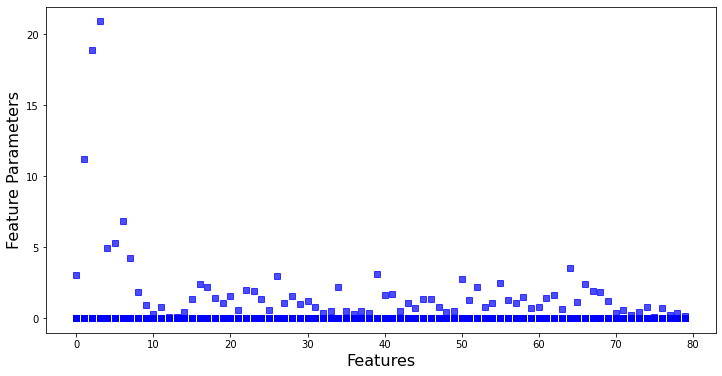

In [6]:
import matplotlib.pyplot as plt
# visualize the values of the beta parameters
plt.figure(figsize=(12,6))
plt.plot(lasso.coef_, alpha=0.7, linestyle='none', marker='s', color = 'blue')
plt.xlabel('Features', fontsize=16)
plt.ylabel('Feature Parameters', fontsize=16)
plt.show()

In [7]:
ypred = lasso.predict(test_X)

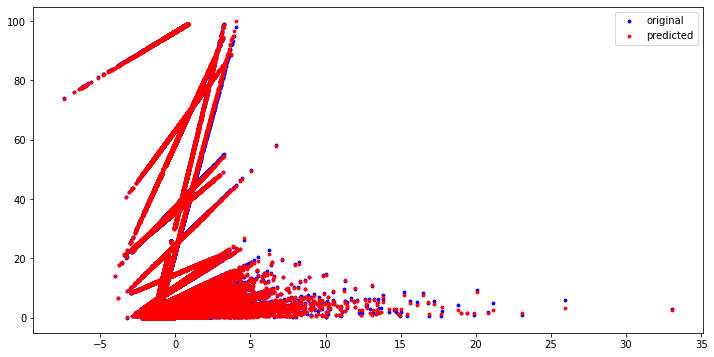

In [8]:
plt.figure(figsize=(12,6))
plt.scatter(test_X, test_Y, s=8, color="blue")
plt.scatter(test_X, ypred,s=8, color="red")
plt.legend(["original","predicted"])
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color("blue")
leg.legendHandles[1].set_color("red")
plt.show()

In [9]:
y_pred = lasso.predict(train_X)

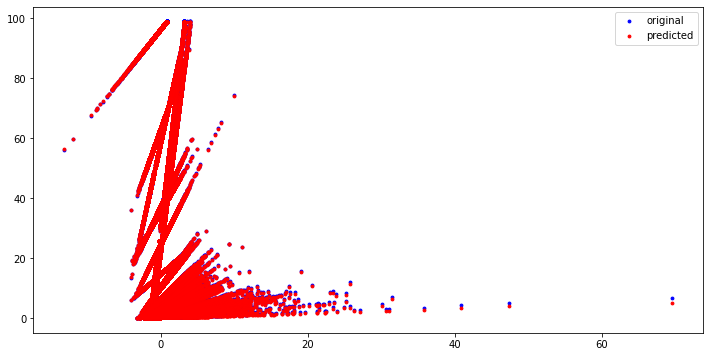

In [11]:
plt.figure(figsize=(12,6))
plt.scatter(train_X, train_Y, s=8,color="blue")
plt.scatter(train_X, y_pred,s=8,color="red")
plt.legend(["original","predicted"])
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color("blue")
leg.legendHandles[1].set_color("red")
plt.show()

In [28]:
df.drop(df.columns[[0,1]], axis = 1, inplace = True)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif['variable'] = df.columns

In [39]:
vif.describe(include='all')

,VIF,variable
count,78.000000,78
unique,NaN,78
top,NaN,compare
freq,NaN,1
mean,7907.730478,NaN
std,45606.125101,NaN
min,1.044977,NaN
25%,2.938488,NaN
50%,13.628855,NaN
75%,67.822913,NaN
